In [ ]:
//second type   


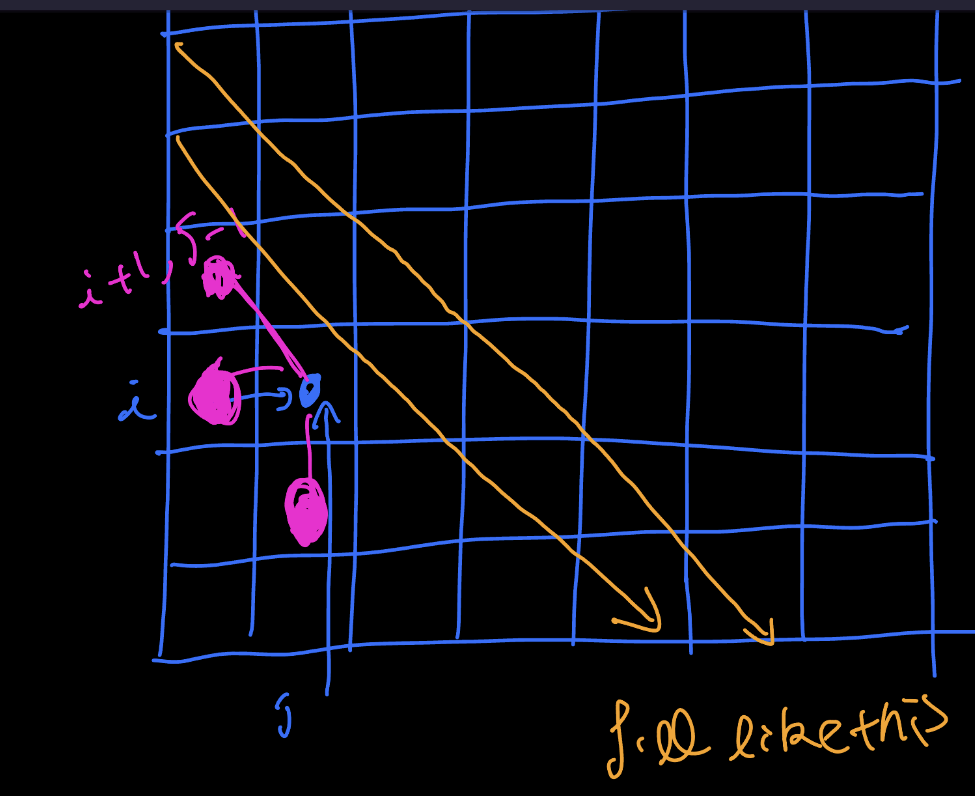

In [ ]:
class Solution {
    public:
        int minInsertions(string s) {
            int n=s.size();
            vector<vector<int>> dp(n,vector<int> (n,0));
            //dp[i][i] requires 0 moves to become a palindrome
            for(int d=1;d<n;d++){
                int i=0,j=d;
                while(i<n and j<n){
                    dp[i][j]= s[i]==s[j]? dp[i+1][j-1]: 1+min(dp[i][j-1],dp[i+1][j]);
                    i++;
                    j++;
                }
            }
            return dp[0][n-1];
            
        }
    };

//third type

In [ ]:
class Solution {
    public:
        int stoneGameV(vector<int>& prefixSum){
            int n=prefixSum.size();
            if(n==1)return 0;
            for(int i=1;i<n;i++)prefixSum[i]+=prefixSum[i-1];
    
            vector<vector<int>>dp(n,vector<int>(n,0));
            for(int i=0;i<n;i++) dp[i][i]=0;
            
            for(int len=2;len<=n;len++){
                for(int s=0;s+len-1<n;s++){
                    int e=s+len-1;
                    int ans=0;
                    for(int splitPoint=s;splitPoint<e;splitPoint++){
                            int lSum=prefixSum[splitPoint];
                            if(s-1>=0)lSum-=prefixSum[s-1];
                            int rSum=prefixSum[e];
                            rSum-=prefixSum[splitPoint];
                            if(lSum<rSum){
                                ans=max(ans,lSum+dp[s][splitPoint]);
                            }
                            else if(rSum<lSum){
                                ans=max(ans,rSum+dp[splitPoint+1][e]);
                            }
                            else{
                                ans=max(ans,lSum+max(dp[s][splitPoint],dp[splitPoint+1][e]));
                            }
                    }
                    dp[s][e]=ans;         
                }
            }
            return dp[0][n-1];            
        }
    };

In [ ]:
class Solution {
    public:
  
      int matrixMultiplication(vector<int> &v) {
          int n=v.size();
          vector<vector<int>> dp(n,vector<int>(n,0));
          for(int i=1;i<n;i++) dp[i][i]=0;
        
          //All the len 1 are already filled 
          for(int len=2;len<=n-1;len++){
              for(int s=1;s+len-1<n;s++){
                  int e=s+len-1;
                  int ans=INT_MAX;
                  for(int splitPoint=s;splitPoint<e;splitPoint++){
                      ans=min(ans,dp[s][splitPoint]+dp[splitPoint+1][e]+v[s-1]*v[splitPoint]*v[e]);
                  }
                  dp[s][e]=ans;         
              }
          }
          return dp[1][n-1];
      }
  };